In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar opciones de visualización
plt.style.use('ggplot')
sns.set(style="darkgrid")

In [4]:
# Cargar el archivo Excel
excel_file = pd.ExcelFile('..\\Data\\Internet.xlsx')

# Listar las hojas disponibles
sheets = excel_file.sheet_names
print("Hojas disponibles en el archivo Excel:")
print(sheets)

Hojas disponibles en el archivo Excel:
['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por velocidad', 'Accesos por velocidad', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos ']


In [5]:
# 2. Carga y Exploración de Datos

# Cargar datos
df = pd.read_excel('..\\Data\\Internet.xlsx')
df_accesos_tecnologia_localidad = pd.read_excel('..\\Data\\Internet.xlsx', sheet_name='Accesos_tecnologia_localidad')
df_velocidad_sin_rangos = pd.read_excel('..\\Data\\Internet.xlsx', sheet_name='Velocidad_sin_Rangos')
df_totales_accesos = pd.read_excel('..\\Data\\Internet.xlsx', sheet_name='Totales Accesos Por Tecnología')
df_penetracion_poblacion = pd.read_excel('..\\Data\\Internet.xlsx', sheet_name='Penetración-poblacion')
df_penetracion_hogares = pd.read_excel('..\\Data\\Internet.xlsx', sheet_name='Penetracion-hogares')
df_penetracion_totales = pd.read_excel('..\\Data\\Internet.xlsx', sheet_name='Penetracion-totales')
df_totales_dial_baf = pd.read_excel('..\\Data\\Internet.xlsx', sheet_name='Totales Dial-BAf')
df_dial_baf = pd.read_excel('..\\Data\\Internet.xlsx', sheet_name='Dial-BAf')
df_accesos_tecnologia = pd.read_excel('..\\Data\\Internet.xlsx', sheet_name='Accesos Por Tecnología')

# Revisar las primeras filas de cada dataframe
print("Accesos por Tecnología y Localidad:")
print(df_accesos_tecnologia_localidad.head())
print("Accesos por Tecnología:")
print(df_accesos_tecnologia.head())
print("\nVelocidades sin Rangos:")
print(df_velocidad_sin_rangos.head())
print("\nTotales Accesos Por Tecnología:")
print(df_totales_accesos.head())
print("\nPenetración por Población:")
print(df_penetracion_poblacion.head())
print("\nPenetración por Hogares:")
print(df_penetracion_hogares.head())
print("\nPenetración Totales:")
print(df_penetracion_totales.head())
print("\nTotales Dial-BAf:")
print(df_totales_dial_baf.head())
print("\nDial-BAf:")
print(df_dial_baf.head())

Accesos por Tecnología y Localidad:
      Provincia     Partido               Localidad Link Indec  ADSL  \
0  BUENOS AIRES  25 de Mayo              25 de Mayo    6854100   755   
1  BUENOS AIRES  25 de Mayo               Del Valle    6854020   181   
2  BUENOS AIRES  25 de Mayo       Gobernador Ugarte    6854040     0   
3  BUENOS AIRES  25 de Mayo  Norberto de la Riestra    6854060     0   
4  BUENOS AIRES  25 de Mayo        Lucas Monteverde    6854050     0   

   CABLEMODEM  DIAL UP  FIBRA OPTICA  OTROS  SATELITAL  WIMAX  WIRELESS  \
0        4600        0             2      0        742      0       727   
1           0        0             0     10          1      0         0   
2           0        0             0      0          0      0       181   
3         782        0           496     16          0      0       185   
4           0        0             0      0          0      0         6   

   Total general  
0           6826  
1            192  
2            181  
3   

In [103]:
df = df.fillna(0)

EN UN ANALISIS SIMPLE ME PERCATE QUE TODOS LOS VALORES FALTANTES PRESENTES ERA POR QUE EN CADA PROVINCIA TIENE UNA CIERTA CANTIDAD DE USUARIOS INSCRITOS EN UNA VELOCIDAD DE INTERNET SIENDO QUE LOS NULOS SON QUE EN ESA VELOCIDAD NO HABIA NINGUN INDIVIDUO SUSCRITO A ESA VELOCIDAD DEL SERVICIO DE INTERNET

In [104]:
df.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,0.0,2.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
df.iloc[:, 4:] = df.iloc[:, 4:].applymap(lambda x: str(x).replace('.0', ''))

C:\Users\tomas\AppData\Local\Temp\ipykernel_16924\4278603140.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.iloc[:, 4:] = df.iloc[:, 4:].applymap(lambda x: str(x).replace('.0', ''))
C:\Users\tomas\AppData\Local\Temp\ipykernel_16924\4278603140.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0         0
1         0
2         0
3         0
4         0
       ... 
3060      0
3061      0
3062      0
3063      8
3064    176
Name: Otros, Length: 3065, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 4:] = df.iloc[:, 4:].applymap(lambda x: str(x).replace('.0', ''))
C:\Users\tomas\AppData\Local\Temp\ipykernel_16924\4278603140.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0
1       0
2       0
3       0
4       0
       ..


PARA NO PERDER DATOS VALIOSOS PERO TAMBIEN PARA NO PERJUDICAR NINGUN CALCULO O ANALISIS DE LOS DATOS DECIDE RELLENAR LOS VALORES FALTANTES CON 0 PARA QUE TENGAN UNA REPRESENTACION NUMERICA PARA POSTERIORMENTE ELIMINAR LOS DECIMALES YA QUE NO HAY MAS NUMEROS DESPUES DEL PUNTO POR LO QUE SON DATOS CUANTITATIVOS DISCRETOS

In [106]:
# Convertir las columnas desde la cuarta en adelante a tipo entero
df.iloc[:, 4:] = df.iloc[:, 4:].astype(int)

# Visualiza tipo de datos
df.dtypes

Provincia     object
Partido       object
Localidad     object
Link Indec    object
Otros         object
               ...  
999 Mbps      object
1000 Mbps     object
1024 Mbps     object
4000 Mbps     object
10000 Mbps    object
Length: 125, dtype: object

VEMOS QUE PESE A EJECUTAR LA FUNCION DE CONVERSION DE TIPO DE STR A NUMERICO NO ESTA RESULTANDO ESTO TIENE QUE VER QUE POSIBLEMENTE NO TODOS LOS VALORES DE ALGUNA COLUMNA SEAN NUMERICOS VERIFIQUEMOS MEDIANTE UNA FUNCION

In [107]:
def check_numeric(df):
    # Verificar si todas las columnas desde la cuarta en adelante tienen valores numéricos
    for column in df.columns[4:]:
        # Intentar convertir toda la columna a numérico y comprobar si no hay valores nulos
        try:
            pd.to_numeric(df[column], errors='raise')
            print(f"Todos los valores en la columna {column} son numéricos")
        except ValueError:
            print(f"Hay valores no numéricos en la columna {column}")

# Verifica
check_numeric(df)


Todos los valores en la columna Otros son numéricos
Todos los valores en la columna 0,256 Mbps son numéricos
Todos los valores en la columna 0,5 Mbps son numéricos
Todos los valores en la columna 0,512 Mbps son numéricos
Todos los valores en la columna 0,75 Mbps son numéricos
Todos los valores en la columna 1 Mbps son numéricos
Todos los valores en la columna 1,5 Mbps son numéricos
Todos los valores en la columna 2 Mbps son numéricos
Todos los valores en la columna 2,2 Mbps son numéricos
Todos los valores en la columna 2,5 Mbps son numéricos
Todos los valores en la columna 3 Mbps son numéricos
Todos los valores en la columna 3,3 Mbps son numéricos
Todos los valores en la columna 3,5 Mbps son numéricos
Todos los valores en la columna 4 Mbps son numéricos
Todos los valores en la columna 4,5 Mbps son numéricos
Todos los valores en la columna 5 Mbps son numéricos
Todos los valores en la columna 6 Mbps son numéricos
Todos los valores en la columna 6,4 Mbps son numéricos
Todos los valores en

EJECUTANDO ESTA FUNCION OBSERVAMOS QUE EXISTEN COLUMNAS QUE NO SON NUMERICAS, ASI QUE PERFECCIONAMOS EL CODIGO

In [108]:
def check_numeric(df):
    # Verificar si todas las columnas desde la cuarta en adelante tienen valores numéricos
    for column in df.columns[4:]:
        # Reemplazar comas por puntos en las columnas
        df[column] = df[column].astype(str).str.replace(',', '.')
        
        # Intentar convertir toda la columna a numérico y comprobar si no hay valores nulos
        try:
            pd.to_numeric(df[column], errors='raise')
            print(f"Todos los valores en la columna {column} son numéricos")
        except ValueError:
            print(f"Hay valores no numéricos en la columna {column}")

# Verificamos
check_numeric(df)


Todos los valores en la columna Otros son numéricos
Todos los valores en la columna 0,256 Mbps son numéricos
Todos los valores en la columna 0,5 Mbps son numéricos
Todos los valores en la columna 0,512 Mbps son numéricos
Todos los valores en la columna 0,75 Mbps son numéricos
Todos los valores en la columna 1 Mbps son numéricos
Todos los valores en la columna 1,5 Mbps son numéricos
Todos los valores en la columna 2 Mbps son numéricos
Todos los valores en la columna 2,2 Mbps son numéricos
Todos los valores en la columna 2,5 Mbps son numéricos
Todos los valores en la columna 3 Mbps son numéricos
Todos los valores en la columna 3,3 Mbps son numéricos
Todos los valores en la columna 3,5 Mbps son numéricos
Todos los valores en la columna 4 Mbps son numéricos
Todos los valores en la columna 4,5 Mbps son numéricos
Todos los valores en la columna 5 Mbps son numéricos
Todos los valores en la columna 6 Mbps son numéricos
Todos los valores en la columna 6,4 Mbps son numéricos
Todos los valores en

In [109]:
# Convertir todas las columnas relevantes a numérico
for column in df.columns[4:]:  # Ajusta el rango de columnas según sea necesario
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [110]:
df.dtypes

Provincia     object
Partido       object
Localidad     object
Link Indec    object
Otros          int64
               ...  
999 Mbps       int64
1000 Mbps      int64
1024 Mbps      int64
4000 Mbps      int64
10000 Mbps     int64
Length: 125, dtype: object

In [111]:
df.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0,0,2,0,19,0,...,0,0,0,0,0,0,0,0,0,0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
columnas_df = [
    'Otros', '0,256 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps',
    '2,5 Mbps', '3 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps', '4,5 Mbps', '5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps',
    '7,5 Mbps', '8 Mbps', '9 Mbps', '10 Mbps', '10,1 Mbps', '10,2 Mbps', '11 Mbps', '12 Mbps', '12,3 Mbps', '13 Mbps',
    '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps', '20 Mbps', '20,5 Mbps', '21 Mbps', '22 Mbps', '23 Mbps',
    '24 Mbps', '25 Mbps', '25,1 Mbps', '25,5 Mbps', '26 Mbps', '27 Mbps', '30 Mbps', '31 Mbps', '32 Mbps', '34 Mbps',
    '35 Mbps', '36 Mbps', '38 Mbps', '39 Mbps', '40 Mbps', '41 Mbps', '45 Mbps', '46 Mbps', '48 Mbps', '49 Mbps',
    '50 Mbps', '50,1 Mbps', '50,25 Mbps', '51 Mbps', '55 Mbps', '58 Mbps', '59 Mbps', '60 Mbps', '61 Mbps', '62 Mbps',
    '64 Mbps', '65 Mbps', '66 Mbps', '70 Mbps', '75 Mbps', '78 Mbps', '80 Mbps', '83 Mbps', '85 Mbps', '90 Mbps',
    '92 Mbps', '95 Mbps', '98 Mbps', '100 Mbps', '100,1 Mbps', '100,25 Mbps', '105 Mbps', '110 Mbps', '120 Mbps',
    '122 Mbps', '125 Mbps', '126 Mbps', '130 Mbps', '140 Mbps', '150 Mbps', '155 Mbps', '158 Mbps', '160 Mbps',
    '164 Mbps', '165 Mbps', '180 Mbps', '200 Mbps', '205 Mbps', '212 Mbps', '220 Mbps', '225 Mbps', '240 Mbps',
    '246 Mbps', '250 Mbps', '256 Mbps', '275 Mbps', '300 Mbps', '320 Mbps', '325 Mbps', '330 Mbps', '340 Mbps',
    '350 Mbps', '400 Mbps', '450 Mbps', '480 Mbps', '500 Mbps', '512 Mbps', '520 Mbps', '540 Mbps', '600 Mbps',
    '680 Mbps', '700 Mbps', '800 Mbps', '850 Mbps', '900 Mbps', '999 Mbps', '1000 Mbps', '1024 Mbps'
]

# Imprimir las columnas del DataFrame para verificar
print("Columnas en df:")
print(df.columns)

# Verificar columnas que están en df pero no en columnas_df
missing_columns = [col for col in columnas_df if col not in df.columns]
print("Columnas en columnas_df que no están en df:")
print(missing_columns)

# Filtrar columnas_df para incluir solo las que están en df
columnas_df_corrected = [col for col in columnas_df if col in df.columns]

# Agrupar y sumar por Provincia
df_group_provincia = df.groupby(by="Provincia")[columnas_df_corrected].sum().reset_index()

# Agrupar y sumar por Partido (Distrito)
df_group_distrito = df.groupby(by="Partido")[columnas_df_corrected].sum().reset_index()

# Agrupar y sumar por Localidad
df_group_localidad = df.groupby(by="Localidad")[columnas_df_corrected].sum().reset_index()

# Mostrar los resultados
print("\nAgrupación por Provincia:")
print(df_group_provincia.head())
print("\nAgrupación por Partido (Distrito):")
print(df_group_distrito.head())
print("\nAgrupación por Localidad:")
print(df_group_localidad.head())

Columnas en df:
Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'Otros',
       '0,256 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps',
       ...
       '680 Mbps', '700 Mbps', '800 Mbps', '850 Mbps', '900 Mbps', '999 Mbps',
       '1000 Mbps', '1024 Mbps', '4000 Mbps', '10000 Mbps'],
      dtype='object', length=125)
Columnas en columnas_df que no están en df:
['34 Mbps', '38 Mbps', '39 Mbps', '46 Mbps', '58 Mbps', '62 Mbps', '64 Mbps', '78 Mbps', '83 Mbps', '92 Mbps', '126 Mbps', '158 Mbps', '340 Mbps']

Agrupación por Provincia:
      Provincia   Otros  0,256 Mbps  0,5 Mbps  0,512 Mbps  0,75 Mbps  1 Mbps  \
0  BUENOS AIRES  125147          18     25815         169       4611   17899   
1          CABA       0          31       451          34       1307    4111   
2     CATAMARCA      70           0        34          37          0     176   
3         CHACO    3816           0       234           2          0     416   
4        CHUBUT   16640           8        6

In [113]:
df_group_provincia.head()

,Provincia,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,5 Mbps",2 Mbps,"2,2 Mbps",...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
0,BUENOS AIRES,125147,18,25815,169,4611,17899,141,19520,0,...,0,12163,0,0,563,0,0,26,156691,0
1,CABA,0,31,451,34,1307,4111,0,249,0,...,0,372,0,1,1,0,0,25,68405,0
2,CATAMARCA,70,0,34,37,0,176,0,115,0,...,0,834,0,0,0,0,0,0,20,0
3,CHACO,3816,0,234,2,0,416,0,780,0,...,0,679,0,0,0,0,0,0,150,0
4,CHUBUT,16640,8,69,34,836,247,0,1870,0,...,0,31,0,0,0,0,0,2,0,0


In [114]:
df_group_distrito.head()

,Partido,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,5 Mbps",2 Mbps,"2,2 Mbps",...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
0,12 de Octubre,0,0,4,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1º de Mayo,0,0,1,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2 de Abril,0,0,29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25 de Mayo,762,0,8,6,19,141,0,289,0,...,0,0,0,0,0,0,0,0,0,0
4,9 de Julio,4,0,24,3,9,280,0,202,0,...,0,0,0,0,0,0,0,0,12,0


In [115]:
df_group_localidad.head()

,Localidad,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,5 Mbps",2 Mbps,"2,2 Mbps",...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
0,11 De Septiembre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,136,0
1,11 de Octubre,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12 de Octubre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1º de Mayo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20 De Junio,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,69,0


CONSULTAR LOS DATOS CON FUNCIONES ES MUCHO MAS SENCILLO QUE TAN SOLO SIMPLIFICAR LOS DATOS

Ahora miramos la hoja de Accesos por Tecnologia para poder saber que tipo de conexion nos estan ofreciendo

In [116]:
df_accesos_tecnologia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


In [117]:
df_accesos_tecnologia.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
981,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
982,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
983,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Aca se observa que en Año y Trimestre tenemos valores que no queremos, asi que vamos a tratar con dichos valores. Tambien podemos observar que las columnas del tipo de tecnologia estan como FLOATS asi que vamos a transformar estas a INT

In [118]:
# Eliminamos las filas que no queremos
df_accesos_tecnologia = df_accesos_tecnologia[:-2]

# Limpiar la columna 'Año'
# Reemplazar los valores no numéricos con NaN
df_accesos_tecnologia['Año'] = pd.to_numeric(df_accesos_tecnologia['Año'], errors='coerce')

# Eliminar filas donde 'Año' es NaN
df_accesos_tecnologia = df_accesos_tecnologia.dropna(subset=['Año'])

# Convertir la columna 'Año' a enteros
df_accesos_tecnologia['Año'] = df_accesos_tecnologia['Año'].astype('Int64')

# Reemplazamos el '.0' por un ''
df_accesos_tecnologia.iloc[:, 3:] = df_accesos_tecnologia.iloc[:, 3:].applymap(lambda x: str(x).replace('.0', ''))

# Y por ultimo vamos a cambiar el tipo de dato
columns_to_convert_accesos = df_accesos_tecnologia.columns[3:]
df_accesos_tecnologia[columns_to_convert_accesos] = df_accesos_tecnologia[columns_to_convert_accesos].apply(pd.to_numeric, errors='coerce').astype('Int64')

# Verificamos
df_accesos_tecnologia.dtypes

C:\Users\tomas\AppData\Local\Temp\ipykernel_16924\3877360293.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_accesos_tecnologia.iloc[:, 3:] = df_accesos_tecnologia.iloc[:, 3:].applymap(lambda x: str(x).replace('.0', ''))
C:\Users\tomas\AppData\Local\Temp\ipykernel_16924\3877360293.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      203297
1       70108
2        5901
3       11343
4       26306
        ...  
979     18927
980    322662
981     32567
982     21618
983    129717
Name: ADSL, Length: 912, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_accesos_tecnologia.iloc[:, 3:] = df_accesos_tecnologia.iloc[:, 3:].applymap(lambda x: str(x).replace('.0', ''))
C:\Users\tomas\AppData\Local\Temp\ipykernel_16924\3877360293.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will rai

Año              Int64
Trimestre       object
Provincia       object
ADSL             Int64
Cablemodem       Int64
Fibra óptica     Int64
Wireless         Int64
Otros            Int64
Total            Int64
dtype: object

Vemos que tiene la sheet de 'Accesos tecnologia Localidad'

In [119]:
df_accesos_tecnologia_localidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


In [120]:
df_accesos_tecnologia_localidad.tail()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
3347,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
3348,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
3349,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
3350,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
3351,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0


Se observan varios valores NaN y se procede a tratarlos

In [121]:
# Eliminar filas donde las columnas 'Provincia', 'Partido', 'Localidad', y 'Link Indec' son NaN
df_accesos_tecnologia_localidad.dropna(subset=['Provincia', 'Partido', 'Localidad', 'Link Indec'], how='all', inplace=True)

In [122]:
df_accesos_tecnologia_localidad.tail()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
3067,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0,0,0,7422,0,0,0,0,7422
3068,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0,0,0,0,0,0,0,424,424
3069,TUCUMAN,Trancas,Villa de Trancas,90112030,95,0,0,0,33,0,0,71,199
3070,TUCUMAN,Yerba Buena,Villa Carmela,90119020,636,0,0,0,1,0,0,79,716
3071,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030,129,46,0,17796,33,0,0,1,18005


In [123]:
df_accesos_tecnologia_localidad.dtypes

Provincia        object
Partido          object
Localidad        object
Link Indec       object
ADSL              int64
CABLEMODEM        int64
DIAL UP           int64
FIBRA OPTICA      int64
OTROS             int64
SATELITAL         int64
WIMAX             int64
WIRELESS          int64
Total general     int64
dtype: object

In [124]:
# Hacemos una revision por si hay algun error en las columnas modificadas y hay valores no queridos

# Valores únicos para las columnas de tipo int64
int_columns = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS', 'Total general']
for column in int_columns:
    unique_values = df_accesos_tecnologia_localidad[column].unique()
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)
    print()

Valores únicos en la columna 'ADSL':
[  755   181     0    75   154  4241   450   193    81   766   464   335
   285    86    39     4    11    16     1     3     9     2   773    50
   903   703    15   329  1834  1692  3774   320  1347  1010    96   650
   247  1348    40    94    10  3116   727   500   321   135  1250   815
   808   102   909    63   175   144  1167    12   322    52  1334   260
    59  1847    98  2031    55  4051   634   204   555   691   226  1045
  1196  1415  3400   306   185   700    54    60   294  1140   397    61
    58    23    33    34   314   424    30    49   256  4318   218  1200
    26   433   352  1948   156  1202   244  1112  1313   246  9494   358
   542   666   275   111   177    44   562   214   317   368   124    79
   297   148  1282  2637   365  1349  1422  2329    28   101    18    25
    36    51   518   131   233  4526   213  7362    89     7   239  1411
   252   814   288   330   587    87   163    21   290    71   425  1681
   190    99  

QUEREMOS SABER CUANTOS SERVICIOS DE UN ACESSO TECNOLOGICO CUENTA UNA POVINCIA ESO PUEDE SER MOROSO VERLO PARA ESO LLEGA LA IMPLEMENTACION DE UN FUNCION QUE NOS FACILITARA LA VIDA

In [125]:
def filtrar_provincia_tecnologia(df, provincia, tecnologia):
    # Verificar si la provincia está en el DataFrame
    if provincia not in df['Provincia'].values:
        return f"Provincia '{provincia}' no encontrada."
    
    # Verificar si la tecnología está en las columnas del DataFrame
    if tecnologia not in df.columns:
        return f"Tecnología '{tecnologia}' no encontrada."
    
    # Filtrar el DataFrame por provincia y tecnología
    df_filtrado = df[df['Provincia'] == provincia][['Provincia', tecnologia]]
    
    return df_filtrado

# Ejemplo de uso
resultado = filtrar_provincia_tecnologia(df_accesos_tecnologia_localidad, 'Buenos Aires', 'ADSL')
print(resultado)

Provincia 'Buenos Aires' no encontrada.


Aca podemos ver como no esta normalizado la columna provincia, pero aprovechamos y normalizamos las otras columnas tambien

In [126]:
def normalizar_columnas(df):
    # Convertir a minúsculas las columnas especificadas
    columnas_a_normalizar = ['Provincia', 'Partido', 'Localidad']
    
    for columna in columnas_a_normalizar:
        if columna in df.columns:
            df[columna] = df[columna].str.lower()
    
    return df

# Aplicar la normalización al DataFrame
df_accesos_tecnologia_localidad = normalizar_columnas(df_accesos_tecnologia_localidad)

In [127]:
print(df_accesos_tecnologia_localidad[['Provincia', 'Partido', 'Localidad']].head())
print(df_accesos_tecnologia_localidad[['Provincia', 'Partido', 'Localidad']].tail())

      Provincia     Partido               Localidad
0  buenos aires  25 de mayo              25 de mayo
1  buenos aires  25 de mayo               del valle
2  buenos aires  25 de mayo       gobernador ugarte
3  buenos aires  25 de mayo  norberto de la riestra
4  buenos aires  25 de mayo        lucas monteverde
     Provincia      Partido                           Localidad
3067   tucuman   tafí viejo  villa mariano moreno - el colmenar
3068   tucuman      trancas                san pedro de colalao
3069   tucuman      trancas                   villa  de trancas
3070   tucuman  yerba buena                       villa carmela
3071   tucuman  yerba buena            yerba buena - marcos paz


Tambien nos damos cuenta que en Localidad puede haber una confusion por el '-', asi que nos quedamos con solo una parte de esta columna

In [128]:
# Tomar la parte antes del guion en la columna 'Localidad'
df_accesos_tecnologia_localidad['Localidad'] = df_accesos_tecnologia_localidad['Localidad'].str.split(' - ').str[0]

# Verificamos
print(df_accesos_tecnologia_localidad[['Localidad']].head())
print(df_accesos_tecnologia_localidad[['Localidad']].tail())

                Localidad
0              25 de mayo
1               del valle
2       gobernador ugarte
3  norberto de la riestra
4        lucas monteverde
                 Localidad
3067  villa mariano moreno
3068  san pedro de colalao
3069     villa  de trancas
3070         villa carmela
3071           yerba buena


Ya ahora se pueden hacer consultas mejor, ya que tenemos los datos mas prolijos

Analizamos Accesos Tecnologia Localidad

In [129]:
df_accesos_tecnologia_localidad.isna().sum()

Provincia        0
Partido          0
Localidad        0
Link Indec       0
ADSL             0
CABLEMODEM       0
DIAL UP          0
FIBRA OPTICA     0
OTROS            0
SATELITAL        0
WIMAX            0
WIRELESS         0
Total general    0
dtype: int64

In [130]:
# Hacemos una vista de dicho DataFrame

df_accesos_tecnologia_localidad

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,buenos aires,25 de mayo,25 de mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,buenos aires,25 de mayo,del valle,6854020,181,0,0,0,10,1,0,0,192
2,buenos aires,25 de mayo,gobernador ugarte,6854040,0,0,0,0,0,0,0,181,181
3,buenos aires,25 de mayo,norberto de la riestra,6854060,0,782,0,496,16,0,0,185,1479
4,buenos aires,25 de mayo,lucas monteverde,6854050,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,tucuman,tafí viejo,villa mariano moreno,90105100,0,0,0,7422,0,0,0,0,7422
3068,tucuman,trancas,san pedro de colalao,90112020,0,0,0,0,0,0,0,424,424
3069,tucuman,trancas,villa de trancas,90112030,95,0,0,0,33,0,0,71,199
3070,tucuman,yerba buena,villa carmela,90119020,636,0,0,0,1,0,0,79,716


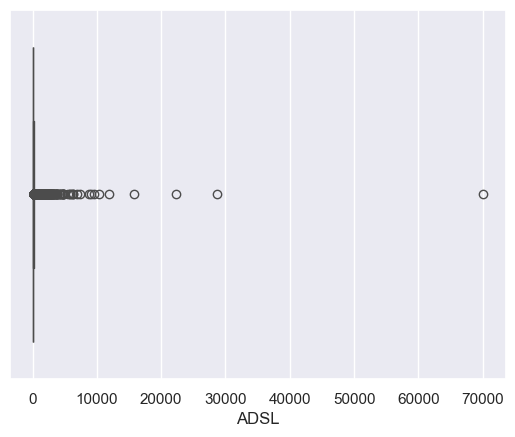

In [131]:
#Dibujar un diagrama de caja para verificar outliers
sns.boxplot(data=df_accesos_tecnologia_localidad, x="ADSL")
plt.show()

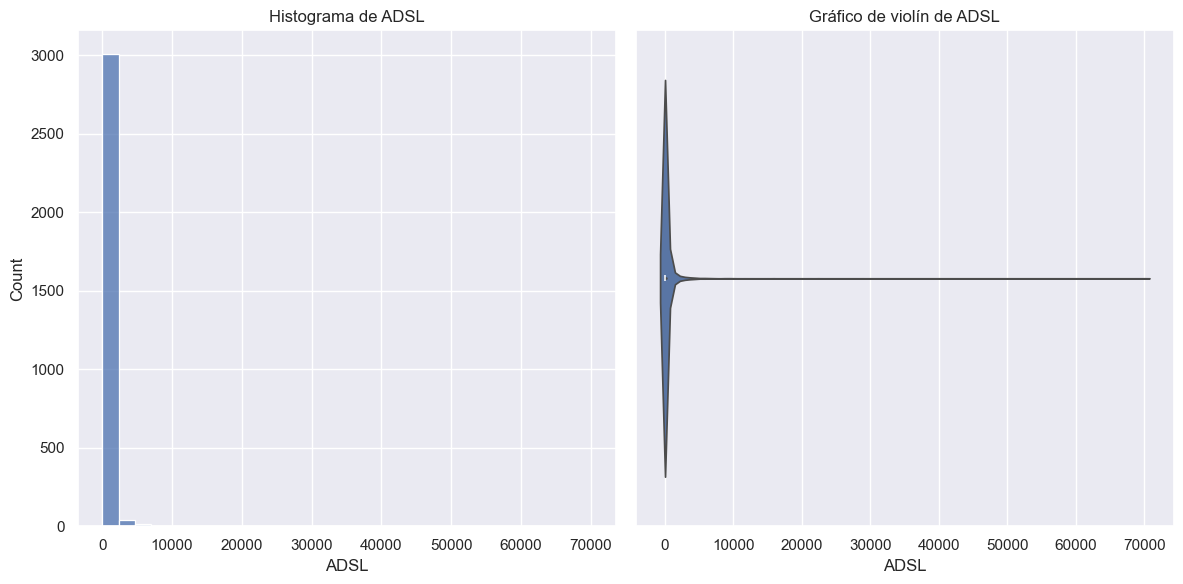

In [132]:
# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma
sns.histplot(data=df_accesos_tecnologia_localidad, x="ADSL", bins=30, ax=axes[0])
axes[0].set_title('Histograma de ADSL')

# Gráfico de violín
sns.violinplot(data=df_accesos_tecnologia_localidad, x="ADSL", ax=axes[1])
axes[1].set_title('Gráfico de violín de ADSL')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Aqui se obvserva como tenemos muchos outliers, asi que debemos mejorar esto

Identificamos y manejamos valores atipicos en los datos

In [133]:
Q1 = df_accesos_tecnologia_localidad["ADSL"].quantile(0.25)
Q3 = df_accesos_tecnologia_localidad["ADSL"].quantile(0.75)
IQR = Q3 - Q1

In [134]:
outliers = df_accesos_tecnologia_localidad[(df_accesos_tecnologia_localidad["ADSL"] < (Q1 - 1.5 * IQR)) | (df_accesos_tecnologia_localidad["ADSL"] > (Q3 + 1.5 * IQR))]

In [135]:
outliers

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,buenos aires,25 de mayo,25 de mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,buenos aires,25 de mayo,del valle,6854020,181,0,0,0,10,1,0,0,192
8,buenos aires,9 de julio,9 de julio,6588100,4241,3553,80,6238,0,0,0,831,14943
9,buenos aires,9 de julio,alfredo demarchi (est. facundo quiroga),6588010,450,0,0,0,60,0,0,0,510
11,buenos aires,9 de julio,manuel b. gonnet (est. french),6588060,193,0,0,2,2,0,0,0,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,tucuman,lules,lules,90063050,637,1,0,2770,4,0,0,233,3645
3041,tucuman,monteros,monteros,90070030,718,0,0,20,0,0,0,226,964
3050,tucuman,río chico,aguilares,90077010,1407,0,0,0,0,0,0,93,1500
3065,tucuman,tafí viejo,tafí viejo,90105080,2779,583,0,9962,11,0,0,11,13346


Aca podemos identificar 593 outliers, para poder manejarlos simplemente podemos utilizar la normalizacion de datos logaritmica 

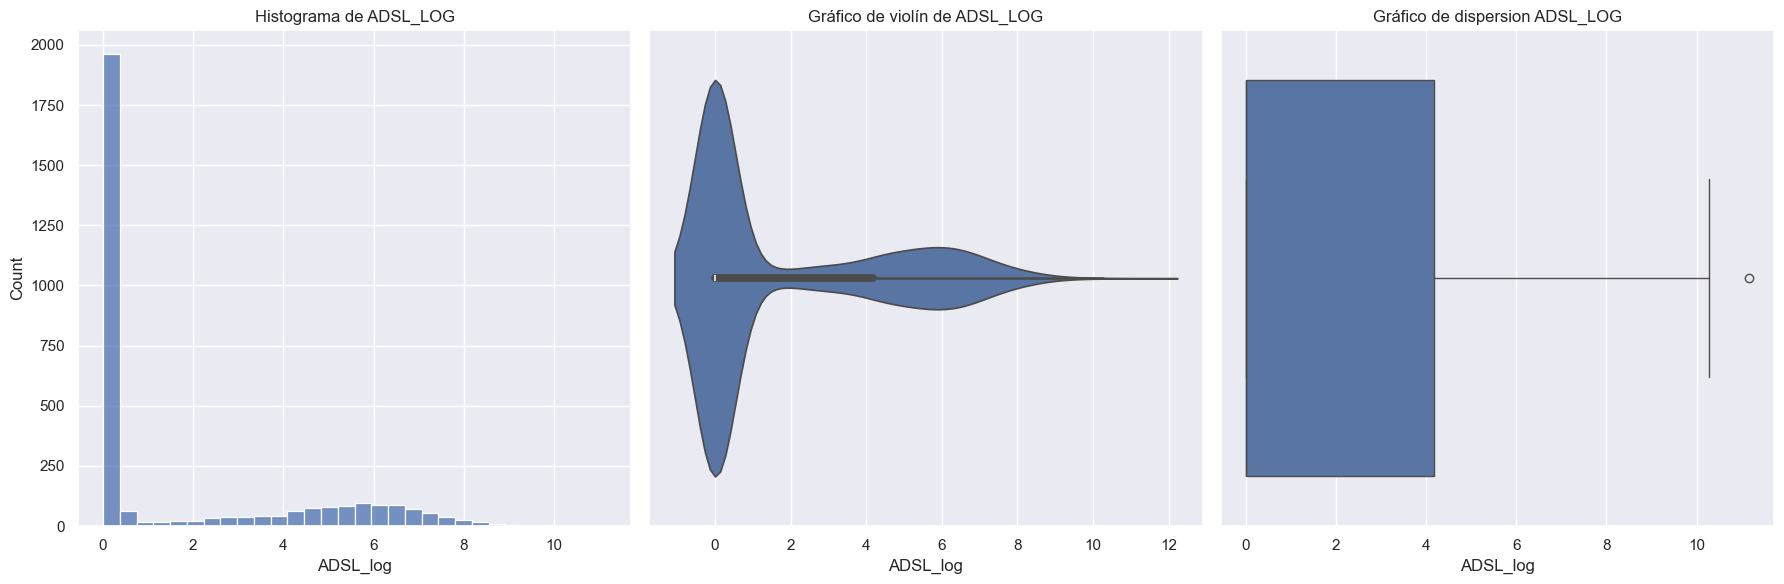

In [136]:
# Trasnformacion logaritmica
df_accesos_tecnologia_localidad["ADSL_log"] = np.log(df_accesos_tecnologia_localidad["ADSL"] + 1)  # +1 para evitar log(0)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma
sns.histplot(data=df_accesos_tecnologia_localidad, x="ADSL_log", bins=30, ax=axes[0])
axes[0].set_title('Histograma de ADSL_LOG')

# Gráfico de violín
sns.violinplot(data=df_accesos_tecnologia_localidad, x="ADSL_log", ax=axes[1])
axes[1].set_title('Gráfico de violín de ADSL_LOG')

#Gráfico de dispersion
sns.boxplot(data=df_accesos_tecnologia_localidad, x="ADSL_log",ax=axes[2])
axes[2].set_title('Gráfico de dispersion ADSL_LOG')
# Mostrar los gráficos
plt.tight_layout()
plt.show()

**Conclusiones:**

Histograma: La distribución de ADSL_log parece ser asimétrica a la derecha, con una cola larga hacia valores más altos. Esto sugiere que la mayoría de los valores se concentran en la parte inferior del rango, pero hay algunos valores atípicos muy altos.

Gráfico de Violín: Confirma la asimetría a la derecha, con una densidad más alta en los valores más bajos y una cola más larga hacia la derecha.

Presencia de Outliers:

Tanto el histograma como el gráfico de violín sugieren la presencia de algunos valores atípicos muy altos en la variable ADSL_log. Estos valores podrían estar influyendo en la forma de la distribución y en los cálculos estadísticos.
Rango de Valores:

La mayoría de los valores de ADSL_log se encuentran entre 0 y aproximadamente 6. Sin embargo, hay algunos valores que alcanzan hasta 12.


Ahora vamos a tratar con la hoja de Penetracion Poblacion, ya que esta contiene como dato importante, el porcentaje de accesos a internet por cada 100 hogares

In [137]:
df_penetracion_hogares.head(10)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89
5,2024,1,Córdoba,90.70
6,2024,1,Corrientes,51.94
7,2024,1,Entre Ríos,69.31
8,2024,1,Formosa,39.61
9,2024,1,Jujuy,57.65


In [138]:
# Redondeamos valores

df_penetracion_hogares["Accesos por cada 100 hogares"] = df_penetracion_hogares["Accesos por cada 100 hogares"].round(2)

In [139]:
df_penetracion_hogares.tail()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
979,2014,1,Santa Cruz,28.94
980,2014,1,Santa Fe,47.85
981,2014,1,Santiago Del Estero,16.31
982,2014,1,Tierra Del Fuego,63.97
983,2014,1,Tucumán,33.42


In [186]:
# Limitar 'Accesos por cada 100 hogares' a 2 decimales
df_penetracion_hogares['Accesos por cada 100 hogares'] = df_penetracion_hogares['Accesos por cada 100 hogares'].round(2)

Ya en la primera vista de este df podemos ver como aperece un outlier de 119%, asi que vamos a tratar con dicho outlier. Simplemente viendo aquellos que estan arriba del 100% vamos a poder detectar cuales son dichos outliers

In [140]:
df_outliers_penetracion_hogares = df_penetracion_hogares[(df_penetracion_hogares["Accesos por cada 100 hogares"] > 100)]

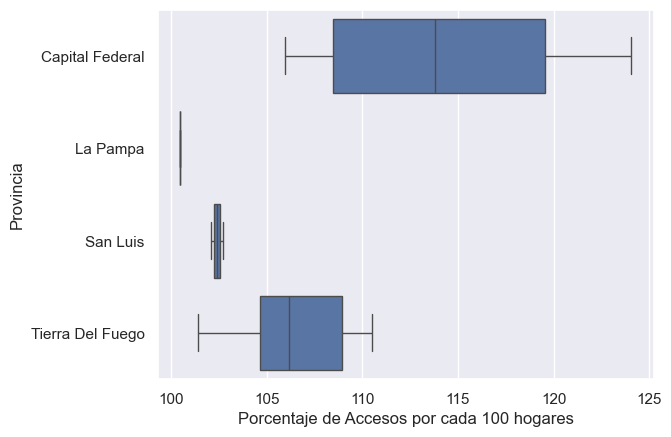

In [141]:
sns.boxplot(data=df_outliers_penetracion_hogares, x="Accesos por cada 100 hogares", y="Provincia")
plt.xlabel("Porcentaje de Accesos por cada 100 hogares")
plt.show()

Hemos identificado outliers en los datos de crecimiento de la contratación del servicio de internet, específicamente en las cuatro provincias que estamos analizando. Dado que estos outliers representan datos que, aunque pueden ser pocas filas, reflejan importantes incrementos en el crecimiento del servicio, no los eliminaremos por completo

In [142]:
# Normalizar la columna 'Provincia' a minúsculas
df_penetracion_hogares['Provincia'] = df_penetracion_hogares['Provincia'].str.lower()

# Luego de normalizar para que no hayan futuros problemas, vemos que tenemos
df_penetracion_hogares['Provincia'].unique()

array(['buenos aires', 'capital federal', 'catamarca', 'chaco', 'chubut',
       'córdoba', 'corrientes', 'entre ríos', 'formosa', 'jujuy',
       'la pampa', 'la rioja', 'mendoza', 'misiones', 'neuquén',
       'río negro', 'salta', 'san juan', 'san luis', 'santa cruz',
       'santa fe', 'santiago del estero', 'tierra del fuego', 'tucumán'],
      dtype=object)

In [143]:
df_penetracion_hogares[(df_penetracion_hogares["Accesos por cada 100 hogares"] <= 120) & (df_penetracion_hogares["Provincia"] == "capital federal")]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
1,2024,1,capital federal,119.53
25,2023,4,capital federal,117.02
49,2023,3,capital federal,116.40
73,2023,2,capital federal,115.48
193,2022,1,capital federal,111.80
217,2021,4,capital federal,111.27
241,2021,3,capital federal,111.27
265,2021,2,capital federal,110.14
289,2021,1,capital federal,108.42
313,2020,4,capital federal,108.31


Actualmente, enfrentamos un problema significativo: todos estos datos correspondientes a la provincia de Capital Federal son identificados como outliers, lo cual impide utilizar su promedio para reemplazar estos valores en el análisis. En un entorno empresarial, se podría solicitar una segunda verificación o un enlace con la fuente de los datos para confirmar su precisión. Sin embargo, dado que estamos trabajando con recursos limitados en este proyecto, optaremos por usar el valor del primer cuartil como sustituto.

In [144]:
df_penetracion_hogares[(df_penetracion_hogares["Accesos por cada 100 hogares"] < 100)]["Accesos por cada 100 hogares"].quantile(0.25)

32.6675

Una vez tenemos el valor de este primer cuartil, lo restamos a todos los outliers

In [145]:
df_penetracion_hogares.loc[df_penetracion_hogares["Accesos por cada 100 hogares"] > 100, "Accesos por cada 100 hogares"] -= 32.6675

# Verificamos que no haya quedado ningun outlier
df_penetracion_hogares[df_penetracion_hogares["Accesos por cada 100 hogares"] > 100]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares


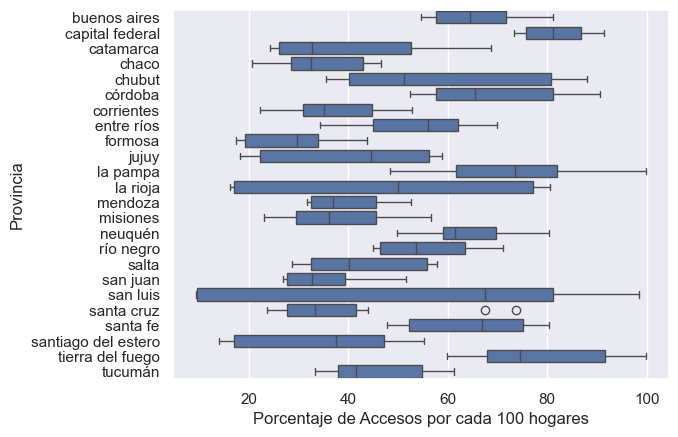

In [146]:
sns.boxplot(data=df_penetracion_hogares, x="Accesos por cada 100 hogares", y="Provincia")
plt.xlabel("Porcentaje de Accesos por cada 100 hogares")
plt.show()

En este boxplot podemos observar como Santa Cruz tiene una gran dispercion de datos y la presencia de valores atipicos

In [147]:
df_penetracion_hogares[(df_penetracion_hogares["Accesos por cada 100 hogares"] > 40) & (df_penetracion_hogares["Provincia"] == "santa cruz")]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
19,2024,1,santa cruz,67.58
43,2023,4,santa cruz,73.75
67,2023,3,santa cruz,40.89
91,2023,2,santa cruz,41.66
115,2023,1,santa cruz,43.42
139,2022,4,santa cruz,43.53
163,2022,3,santa cruz,43.19
187,2022,2,santa cruz,43.15
211,2022,1,santa cruz,43.34
235,2021,4,santa cruz,43.05


Este no parece ser un problema crítico. Aunque el valor de crecimiento es bastante extremo, existen análisis que podrían verificar su exactitud. Sin embargo, para este proyecto en particular, no profundizaremos en la validación de este valor.

In [148]:
# Revision de valores nulos

df_penetracion_hogares.isna().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

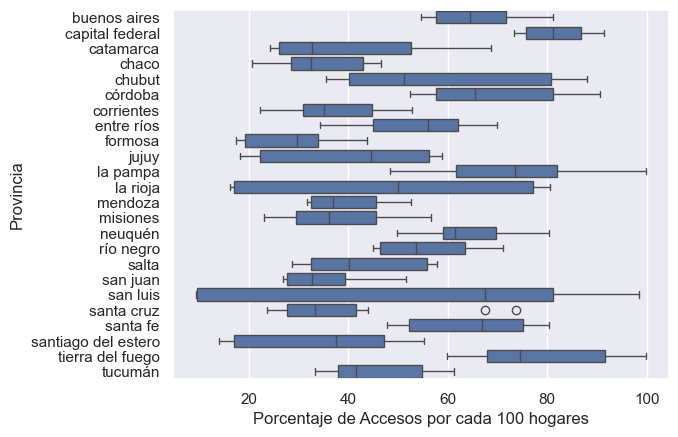

In [149]:
sns.boxplot(data=df_penetracion_hogares, x="Accesos por cada 100 hogares", y="Provincia")
plt.xlabel("Porcentaje de Accesos por cada 100 hogares")
plt.show()

El gráfico presenta un box plot horizontal que compara el porcentaje de accesos por cada 100 hogares en diferentes provincias de Argentina.

Dispersión de Datos: Se observa una gran variabilidad en el porcentaje de accesos entre las diferentes provincias. Algunas provincias tienen un porcentaje muy alto de accesos (cercano al 100%), mientras que otras tienen un porcentaje mucho más bajo.

Outliers: Algunas provincias presentan valores atípicos (outliers), representados por puntos individuales fuera de los bigotes del box plot. Estos outliers indican que hay hogares en esas provincias con un porcentaje de accesos significativamente mayor o menor que el resto.

Distribución: La mayoría de las provincias se concentran en un rango de porcentaje de accesos similar, sin embargo, hay algunas provincias que se destacan por tener valores máximos o mínimos más altos.

#### **Ahora vamos a ver la sheet de Pentracion Poblacion, ya que es igual de interesante que la recien vista**

In [150]:
# Al igual que con Penetracion Hogares, vamos a ver primero con que estamos tratando

df_penetracion_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.80
1,2024,1,Capital Federal,48.78
2,2024,1,Catamarca,17.50
3,2024,1,Chaco,12.48
4,2024,1,Chubut,26.02


In [151]:
df_penetracion_poblacion.tail()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
979,2014,1,Santa Cruz,8.677327
980,2014,1,Santa Fe,15.077801
981,2014,1,Santiago Del Estero,4.058899
982,2014,1,Tierra Del Fuego,19.104921
983,2014,1,Tucumán,8.307215


In [152]:
# Redondeamos los numeros dentro de 'Accesos por cada 100 hab' 

df_penetracion_poblacion["Accesos por cada 100 hab"] = df_penetracion_poblacion["Accesos por cada 100 hab"].round(2)

In [153]:
df_penetracion_poblacion

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.80
1,2024,1,Capital Federal,48.78
2,2024,1,Catamarca,17.50
3,2024,1,Chaco,12.48
4,2024,1,Chubut,26.02
...,...,...,...,...
979,2014,1,Santa Cruz,8.68
980,2014,1,Santa Fe,15.08
981,2014,1,Santiago Del Estero,4.06
982,2014,1,Tierra Del Fuego,19.10


In [154]:
# Normalizamos las provincias para que queden todas en minusculas y no haya un futuro problema
df_penetracion_poblacion['Provincia'] = df_penetracion_poblacion['Provincia'].str.lower()

# Y verficamos
df_penetracion_poblacion['Provincia'].unique()

array(['buenos aires', 'capital federal', 'catamarca', 'chaco', 'chubut',
       'córdoba', 'corrientes', 'entre ríos', 'formosa', 'jujuy',
       'la pampa', 'la rioja', 'mendoza', 'misiones', 'neuquén',
       'río negro', 'salta', 'san juan', 'san luis', 'santa cruz',
       'santa fe', 'santiago del estero', 'tierra del fuego', 'tucumán'],
      dtype=object)

In [155]:
# Chqueo de Valores Nulos
df_penetracion_poblacion.isna().sum()

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

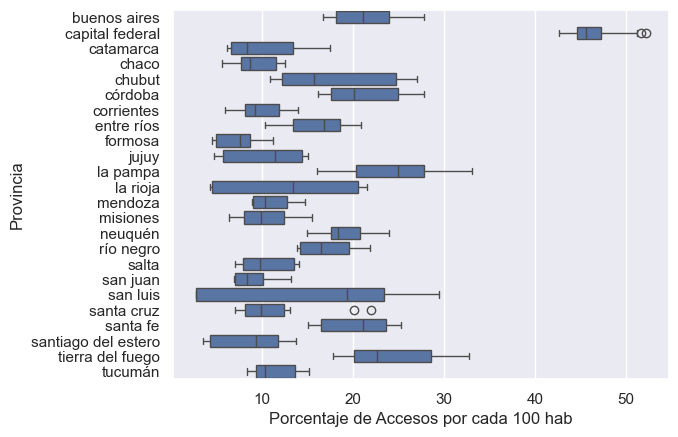

In [156]:
# Creamos diagrama de caja
sns.boxplot(data=df_penetracion_poblacion, x="Accesos por cada 100 hab", y="Provincia")

# Etiqueta para el eje x
plt.xlabel("Porcentaje de Accesos por cada 100 hab")

# Mostrar el gráfico
plt.show()

In [157]:
df_penetracion_poblacion[df_penetracion_poblacion['Provincia'] == 'capital federal']

,Año,Trimestre,Provincia,Accesos por cada 100 hab
1,2024,1,capital federal,48.78
25,2023,4,capital federal,47.80
49,2023,3,capital federal,47.60
73,2023,2,capital federal,47.27
97,2023,1,capital federal,50.23
121,2022,4,capital federal,50.35
145,2022,3,capital federal,50.22
169,2022,2,capital federal,49.87
193,2022,1,capital federal,46.01
217,2021,4,capital federal,45.85


Si bien en el grafico parece que capital federal tenga optuliers, no se van a tratar como tal, ya que esta tiene un predominio de habitantes y otros factores que conllevan a que tenga numeros muy alejados respecto a las demas provincias

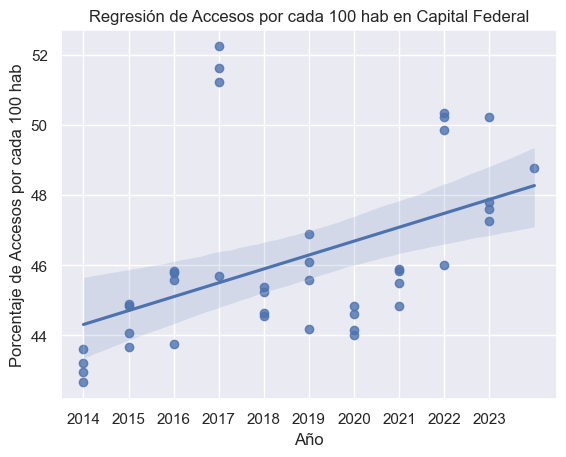

In [158]:
# Filtrar datos para la provincia de "Capital Federal"
data_capital = df_penetracion_poblacion[df_penetracion_poblacion['Provincia'] == 'capital federal']

# Crear el gráfico de regresión utilizando seaborn
sns.regplot(x="Año", y="Accesos por cada 100 hab", data=data_capital)

# Establecer el rango de los ticks en el eje x
plt.xticks(range(2014, 2024))

# Etiquetas para los ejes y título
plt.xlabel('Año')
plt.ylabel('Porcentaje de Accesos por cada 100 hab')
plt.title('Regresión de Accesos por cada 100 hab en Capital Federal')

# Mostrar el gráfico
plt.show()

In [159]:
df_penetracion_poblacion[(df_penetracion_poblacion['Provincia'] == 'capital federal') & (df_penetracion_poblacion['Año'] == 2014)]

,Año,Trimestre,Provincia,Accesos por cada 100 hab
889,2014,4,capital federal,43.60
913,2014,3,capital federal,43.21
937,2014,2,capital federal,42.97
961,2014,1,capital federal,42.66


In [160]:
df_penetracion_poblacion[(df_penetracion_poblacion['Provincia'] == 'capital federal') & (df_penetracion_poblacion['Año'] == 2023)]

,Año,Trimestre,Provincia,Accesos por cada 100 hab
25,2023,4,capital federal,47.80
49,2023,3,capital federal,47.60
73,2023,2,capital federal,47.27
97,2023,1,capital federal,50.23


Conclusiones Principales:

Tendencia al alza: La línea de regresión muestra una pendiente positiva, lo que indica que, en general, el porcentaje de accesos ha aumentado a lo largo del período analizado. Esto sugiere un crecimiento sostenido en la disponibilidad y el uso de los servicios a los que se refiere el gráfico (sin especificar cuáles son).

Crecimiento gradual: El aumento en el porcentaje de accesos parece ser gradual y constante, sin grandes fluctuaciones anuales. Esto sugiere un proceso de mejora continua en la provisión de servicios en la ciudad.

Dispersión de los datos: Los puntos de datos se encuentran dispersos alrededor de la línea de regresión, lo que indica que aunque existe una tendencia general al alza, hay cierta variabilidad en los valores anuales. Esto puede deberse a diversos factores, como cambios en las políticas públicas, eventos económicos o sociales, o fluctuaciones estacionales.

Intervalos de confianza: El área sombreada alrededor de la línea de regresión representa los intervalos de confianza, lo que nos indica el rango de valores en el que es probable que se encuentre el verdadero valor del porcentaje de accesos para cada año.


Cargamos desde las hojas del archivo Excel "Penetracion-Totales", que contienen información principal sobre el porcentaje total de acceso a Internet por cada 100 habitantes, así como el porcentaje total de acceso a Internet por cada 100 hogares.

In [161]:
df_penetracion_totales.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,1,78.89,24.79,Ene-Mar 2024
1,2023,4,78.56,24.66,Oct-Dic 2023
2,2023,3,77.84,24.41,Jul-Sept 2023
3,2023,2,77.02,24.14,Abr-Jun 2023
4,2023,1,77.20,24.17,Ene-Mar 2023


In [162]:
df_penetracion_totales.tail()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
36,2015,1,51.364586,15.677234,Ene-Mar 2015
37,2014,4,50.499788,15.394677,Oct-Dic 2014
38,2014,3,50.672368,15.428769,Jul-Sept 2014
39,2014,2,49.861428,15.163908,Abr-Jun 2014
40,2014,1,49.545821,15.050104,Ene-Mar 2014


In [163]:
# Dividimos por 100 para pasar a %
df_penetracion_totales[["Accesos por cada 100 hogares","Accesos por cada 100 hab"]] = df_penetracion_totales[["Accesos por cada 100 hogares","Accesos por cada 100 hab"]] / 100

In [164]:
# Y redondeamos valores
df_penetracion_totales[["Accesos por cada 100 hogares","Accesos por cada 100 hab"]] = df_penetracion_totales[["Accesos por cada 100 hogares","Accesos por cada 100 hab"]].round(3)

In [165]:
df_penetracion_totales.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,1,0.789,0.248,Ene-Mar 2024
1,2023,4,0.786,0.247,Oct-Dic 2023
2,2023,3,0.778,0.244,Jul-Sept 2023
3,2023,2,0.770,0.241,Abr-Jun 2023
4,2023,1,0.772,0.242,Ene-Mar 2023


In [166]:
# Verificamos si hay algun valor nulo
df_penetracion_totales.isna().sum()

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

In [167]:
df_Penetracion_totales_tendencia = df_penetracion_totales.groupby(by="Año")["Accesos por cada 100 hab"].sum()
df_Penetracion_totales_tendencia = df_Penetracion_totales_tendencia.reset_index()
df_Penetracion_totales_tendencia["Accesos por cada 100 hab"] = df_Penetracion_totales_tendencia["Accesos por cada 100 hab"] / 4

Procesamos los datos de acceso a Internet por cada 100 habitantes. Primero, sumamos todos los accesos para cada año y agrupamos esos datos por año. Luego, reiniciamos el índice para que el año sea una columna normal en lugar del índice del DataFrame. Finalmente, dividimos el total de accesos de cada año por 4 para ajustar los datos y obtener un promedio anual. Esto nos ayuda a ver la tendencia en el acceso a Internet a lo largo del tiempo de manera más clara.

In [168]:
df_Penetracion_totales_tendencia

,Año,Accesos por cada 100 hab
0,2014,0.15275
1,2015,0.15925
2,2016,0.16350
3,2017,0.17200
4,2018,0.18500
5,2019,0.19800
6,2020,0.20250
7,2021,0.21850
8,2022,0.23725
9,2023,0.24350


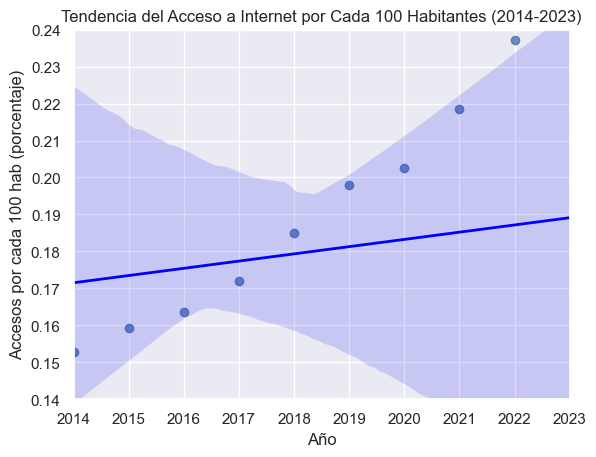

In [169]:
# Crear el gráfico de regresión
sns.regplot(x="Año", y="Accesos por cada 100 hab", data=df_Penetracion_totales_tendencia, line_kws={"color": "blue", "lw": 2})

# Establecer límites del eje y
plt.ylim(0.14, 0.24)

# Establecer límites del eje x (si se requiere ajustar según el rango de los datos)
plt.xlim(2014, 2023)

# Establecer las etiquetas de los ejes
plt.xlabel("Año")
plt.ylabel("Accesos por cada 100 hab (porcentaje)")

# Establecer los ticks de los ejes
plt.xticks(range(2014, 2024))
plt.yticks([0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24])

# Agregar un título
plt.title("Tendencia del Acceso a Internet por Cada 100 Habitantes (2014-2023)")

# Mostrar el gráfico
plt.show()


el gráfico muestra una tendencia positiva en el acceso a internet a lo largo del tiempo. Sin embargo, para obtener una comprensión más profunda de esta tendencia, es necesario analizar los datos con mayor detalle y considerar factores contextuales como las políticas públicas, el desarrollo económico y las características sociodemográficas de la población. Por eso para una mayor profundidad vamos a comparar el crecimiento de cada trimestres por año

PERO ESTE ES EN VERDAD UN GRAFICO QUE PUEDA PROPORCIONARNOS INFORMACION VALIOSA? SI BIEN PODEMOS OBSERVAR UN CRECIMIENTO POSITIVO PERO LA VERDAD PARA MAYOR PROFUNDIDAD COMPARAREMOS EL CRECIMIENTO DE CADA TRIMESTRE POR AÑO

In [170]:
# Creamos el df de comparacion
df_Penetracion_totales_comparacion = df_penetracion_totales[["Año","Trimestre","Accesos por cada 100 hab"]]

# Definimos un df para cada trimestre del año
df_penetracion_trim1 = df_Penetracion_totales_comparacion[df_Penetracion_totales_comparacion['Trimestre'] == 1]
df_penetracion_trim2 = df_Penetracion_totales_comparacion[df_Penetracion_totales_comparacion['Trimestre'] == 2]
df_penetracion_trim3 = df_Penetracion_totales_comparacion[df_Penetracion_totales_comparacion['Trimestre'] == 3]
df_penetracion_trim4 = df_Penetracion_totales_comparacion[df_Penetracion_totales_comparacion['Trimestre'] == 4]

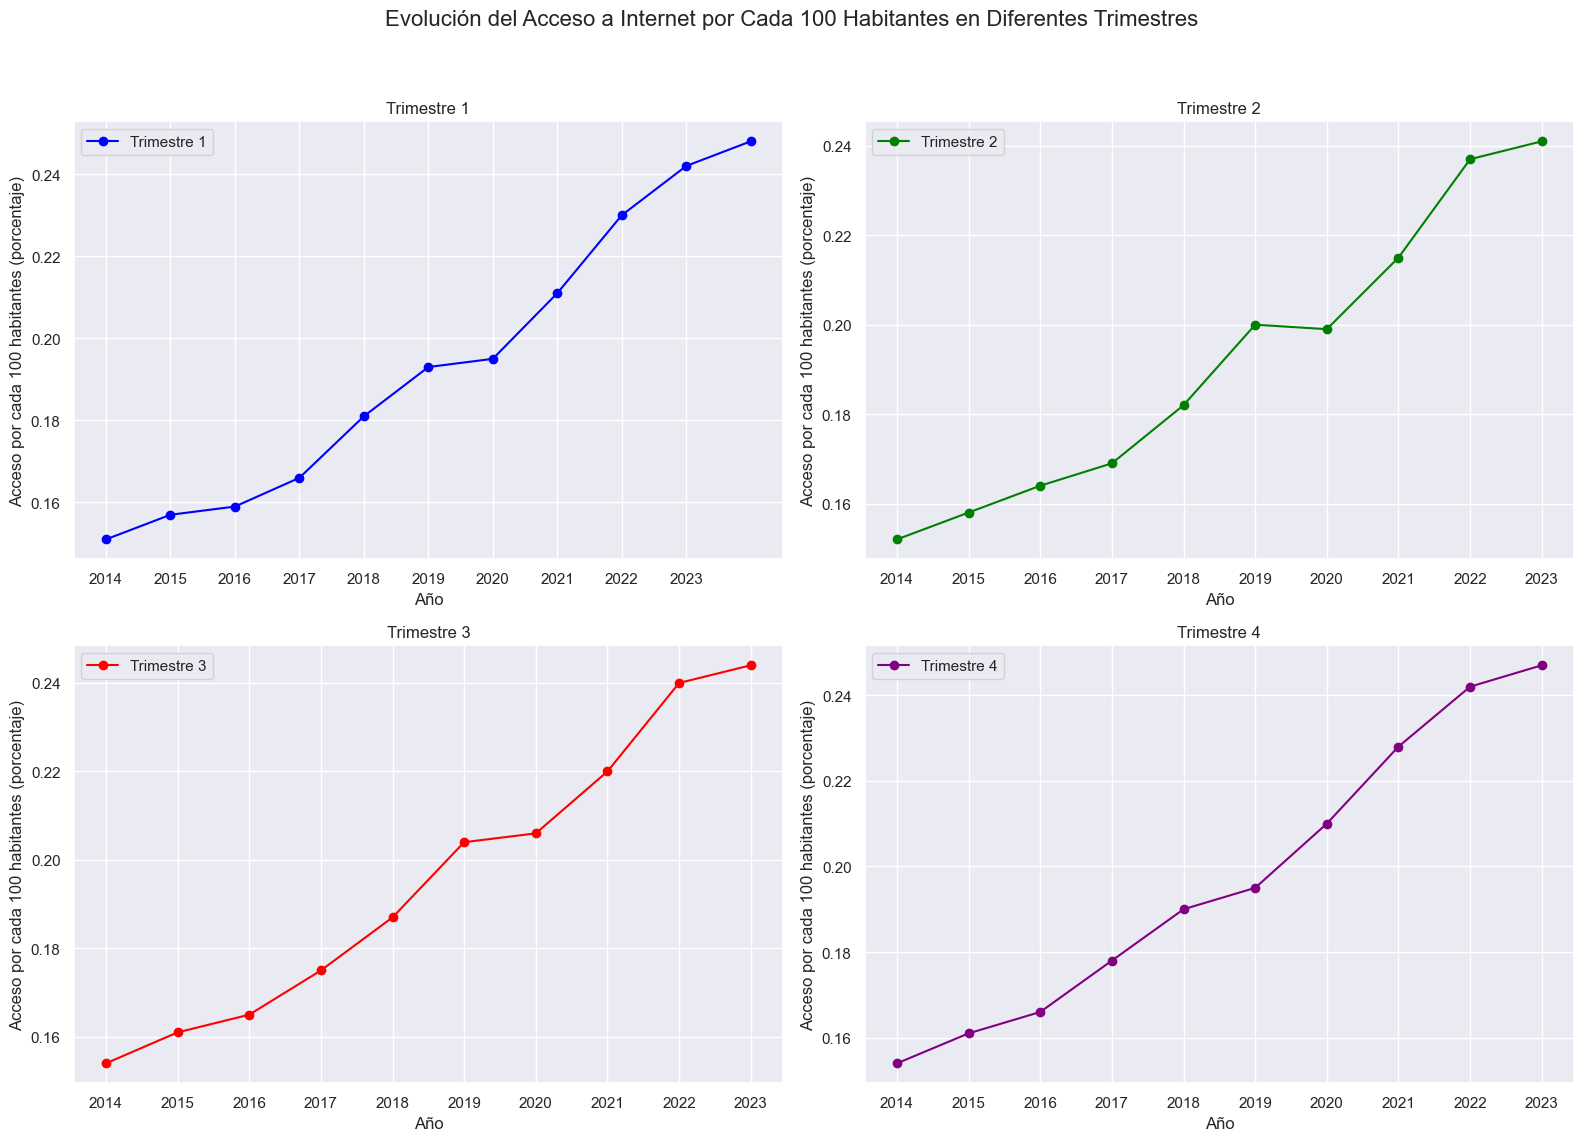

In [171]:
# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))  # Ajustar tamaño para mayor claridad

# Trimestre 1 vs Trimestre 2
axs[0, 0].plot(df_penetracion_trim1['Año'], df_penetracion_trim1['Accesos por cada 100 hab'], marker='o', color='blue', label='Trimestre 1')
axs[0, 0].set_title('Trimestre 1')
axs[0, 0].set_xlabel('Año')
axs[0, 0].set_ylabel('Acceso por cada 100 habitantes (porcentaje)')
axs[0, 0].set_xticks(range(2014, 2024))
axs[0, 0].legend()
axs[0, 0].grid(True)

# Trimestre 2 vs Trimestre 4
axs[0, 1].plot(df_penetracion_trim2['Año'], df_penetracion_trim2['Accesos por cada 100 hab'], marker='o', color='green', label='Trimestre 2')
axs[0, 1].set_title('Trimestre 2')
axs[0, 1].set_xlabel('Año')
axs[0, 1].set_ylabel('Acceso por cada 100 habitantes (porcentaje)')
axs[0, 1].set_xticks(range(2014, 2024))
axs[0, 1].legend()
axs[0, 1].grid(True)

# Trimestre 3 vs Trimestre 1
axs[1, 0].plot(df_penetracion_trim3['Año'], df_penetracion_trim3['Accesos por cada 100 hab'], marker='o', color='red', label='Trimestre 3')
axs[1, 0].set_title('Trimestre 3')
axs[1, 0].set_xlabel('Año')
axs[1, 0].set_ylabel('Acceso por cada 100 habitantes (porcentaje)')
axs[1, 0].set_xticks(range(2014, 2024))
axs[1, 0].legend()
axs[1, 0].grid(True)

# Trimestre 4 vs Trimestre 2
axs[1, 1].plot(df_penetracion_trim4['Año'], df_penetracion_trim4['Accesos por cada 100 hab'], marker='o', color='purple', label='Trimestre 4')
axs[1, 1].set_title('Trimestre 4')
axs[1, 1].set_xlabel('Año')
axs[1, 1].set_ylabel('Acceso por cada 100 habitantes (porcentaje)')
axs[1, 1].set_xticks(range(2014, 2024))
axs[1, 1].legend()
axs[1, 1].grid(True)

# Agregar título general
fig.suptitle('Evolución del Acceso a Internet por Cada 100 Habitantes en Diferentes Trimestres', fontsize=16)

# Ajustar el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar el espacio para el título general
plt.show()

Conclusiones Principales:

Tendencia al alza: En todos los trimestres analizados, se observa un incremento progresivo en el porcentaje de personas con acceso a internet. Esto indica un crecimiento continuo en la penetración de internet en la población.

Estacionalidad limitada: Si bien se presentan cuatro gráficos, uno por cada trimestre, no se evidencia una estacionalidad marcada en los datos. Es decir, no hay un patrón claro de aumento o disminución del acceso a internet en un trimestre específico a lo largo de los años.

Crecimiento acelerado en algunos períodos: Aunque la tendencia general es al alza, se pueden observar periodos de crecimiento más acelerado en comparación con otros. Esto sugiere que pueden haber ocurrido eventos o cambios en las políticas públicas que hayan impulsado la adopción de internet en esos momentos.

Homogeneidad en la tendencia: Los cuatro gráficos presentan patrones similares, lo que indica que el crecimiento del acceso a internet ha sido bastante uniforme a lo largo de los años y a lo largo de los trimestres.


Guardo las hojas en CSVs

In [188]:

df_accesos_tecnologia.to_csv('accesos_por_tecnologia.csv', index=False)

df_accesos_tecnologia_localidad.to_csv('accesos_tecnologia_localidad.csv', index=False)

df_ingresos = pd.read_excel('Internet.xlsx', sheet_name='Ingresos ')
df_ingresos.to_csv('ingresos.csv', index=False)

df_penetracion_hogares.to_csv('penetracion_hogares.csv', index=False)

df_penetracion_poblacion.to_csv('penetracion_poblacion.csv', index=False)

df_penetracion_totales.to_csv('penetracion_totales.csv', index=False)

df_totales_accesos.to_csv('totales_accesos_tecnologia.csv', index=False)

df_totales_accesos_velocidad = pd.read_excel('Internet.xlsx', sheet_name='Totales Accesos por velocidad')
df_totales_accesos_velocidad.to_csv('totales_acceso_velocidad.csv', index=False)